# Projekat klasifikacije tipa đubriva

Cilj mog projekta je predvižanje tipa đubriva koji se treba koristiti na osnovu tipa zemljišta i tipa biljke koji se koriste za uzgoj. Dataset sadrži 7 kategorija tipa đubriva:
* 10-26-26
* 14-35-14
* 17-17-17
* 20-20
* 28-28
* DAP
* Urea


Za određivanje potrebnog tipa đubriva koriste se parametri:
* Temperatura
* Vlažnost
* Hidratacija zemljišta
* Tip zemljišta
* Tip biljke koja se sadi
* Količina azota
* Količina kalijuma
* Količina fosfora


In [2]:
import pandas as pd
from itertools import product
import crop_dataset_columns as cols
import matplotlib.pyplot as plt
import seaborn as sns

url = '/home/nikolastojiljkovic/Podaci/fakultet/ML/Project 1/crops/data_core.csv'

dataframe_crops = pd.read_csv(url)




print('Crops dataframe dimension is ' + str(dataframe_crops.shape))
dataframe_crops.head(5)

Crops dataframe dimension is (8000, 9)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


Kao što vidimo, ova tabela ima 8000 redova i 9 kolona.

In [3]:
dataframe_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


Kolone u datasetu nam govore da od ulaznih parametara posedujemo numeričke podatke u svim kolonama osim u kolonama "Soil type" i "Crop type" koji su kategorički podaci.  

In [4]:
duplicates = list(filter(lambda x: x == True, dataframe_crops.duplicated()))
print(f"Number of duplicates is {len(duplicates)}")


dataframe_crops.groupby([cols.CROP_TYPE_COLUMN, cols.FERTILIZER_NAME_COLUMN]).count()

negatives = dataframe_crops[dataframe_crops["Potassium"] < 0]

Number of duplicates is 0


Naš dataset ne poseduje duplikate, pa nećemo imati potrebe za uklanjamo kolone koje su duplirane.

             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.525594  0.067963 -0.028978  -0.031322     0.166951
Humidity        0.525594  1.000000  0.066713 -0.042701   0.005695     0.136216
Moisture        0.067963  0.066713  1.000000 -0.085016   0.023618     0.011854
Nitrogen       -0.028978 -0.042701 -0.085016  1.000000  -0.445762    -0.635694
Potassium      -0.031322  0.005695  0.023618 -0.445762   1.000000     0.056225
Phosphorous     0.166951  0.136216  0.011854 -0.635694   0.056225     1.000000


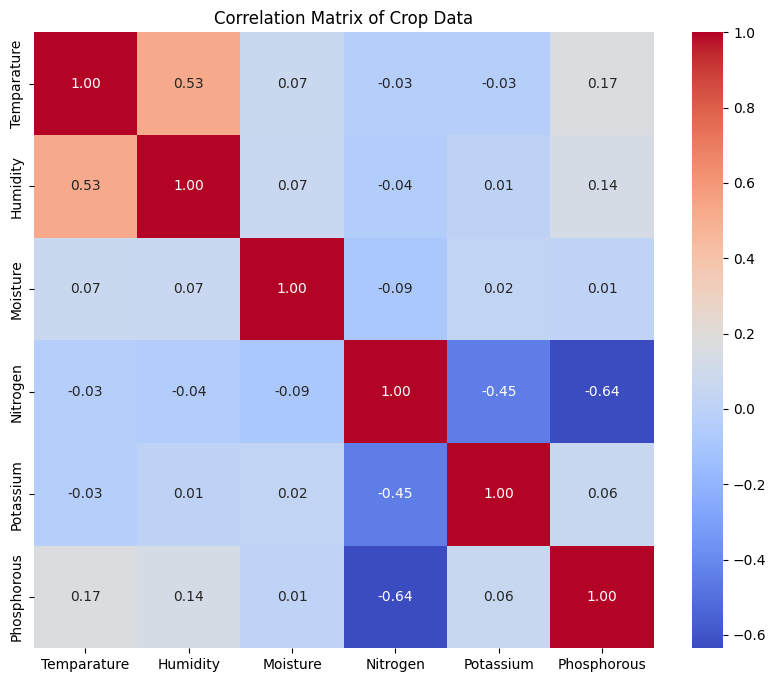

In [ ]:
matrix = dataframe_crops.select_dtypes(include="number").corr()

print(matrix)

plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Crop Data')
plt.show()

In [6]:
dataframe_crops[cols.FERTILIZER_NAME_COLUMN] = (
    dataframe_crops[cols.FERTILIZER_NAME_COLUMN]
    .astype(str)
    .map(cols.fertilizer_groupation)
)
dataframe_crops.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Nitrogenous
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,Phosphatic
2,34.0,65.0,62.0,Black,Cotton,7,9,30,NPK Complex
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,High-N/P
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Nitrogenous


We can see that we have 7 classes and for each of them we have over 1000 examples. This means that we can group our classification results in less than 7 to make our model more exact in prediction.


Možemo videti da imamo 7 klasa i da za svaku klasu postoje 1000 redova u datasetu koji daju rezultat klase. Da bismo probali da povećamo broj reprezentativnih redova u datasetu za klasu, možemo da smanjimo broj klasa tako što ćemo ih grupisati u 4 klase prema pravilu:
    * "10-26-26": "NPK Complex"
    * "14-35-14": "NPK Complex"
    * "17-17-17": "NPK Complex"
    * "20-20": "High-N/P"
    * "28-28": "High-N/P"
    * "DAP": "Phosphatic"
    * "Urea": "Nitrogenous"


Gde smo kreirali klase đubriva sa visokim nivoom fosfora, azota, visokim nivoom i fosfora i azota, i NPK complex (Đubriva koja sadrže i visok nivo azota, i fosfora i kalijuma)

In [7]:
dataframe_crops.groupby([cols.FERTILIZER_NAME_COLUMN]).count()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
Fertilizer Name,,,,,,,,
High-N/P,2223,2223,2223,2223,2223,2223,2223,2223
NPK Complex,3440,3440,3440,3440,3440,3440,3440,3440
Nitrogenous,1170,1170,1170,1170,1170,1170,1170,1170
Phosphatic,1167,1167,1167,1167,1167,1167,1167,1167


In [8]:
# Check duplicates
print(list(filter(lambda x: x is not False, dataframe_crops.duplicated())))

[]


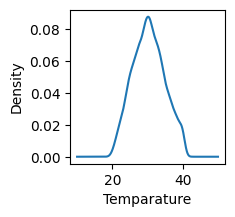

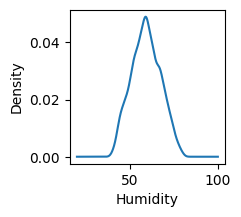

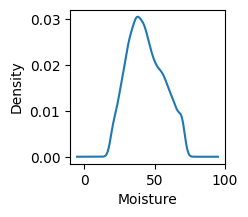

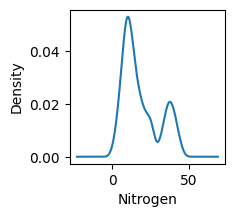

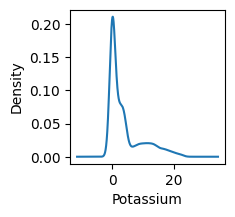

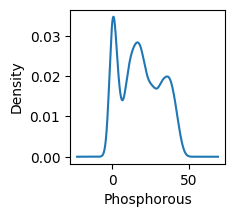

In [9]:
import pandas.api.types as ptypes

# create dataframe out of any column
dataframes_per_column: list[pd.DataFrame] = []
a = cols.column_list
for column in cols.column_list:
    dataframes_per_column.append(dataframe_crops[column])
    
for df, column in zip(dataframes_per_column, cols.column_list):
    if ptypes.is_numeric_dtype(df.dtype):  
        plt.figure(figsize=(2,2))
        
        df.plot(kind='density')
        plt.xlabel(column)
    




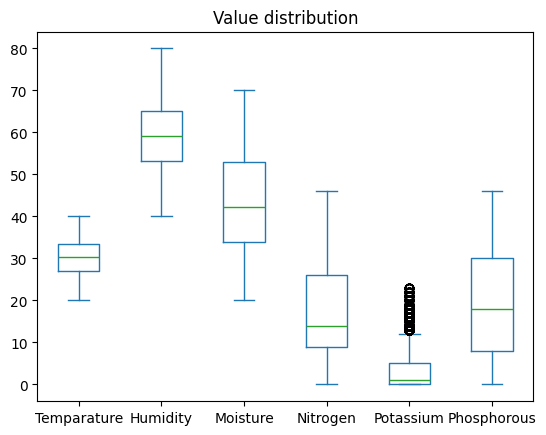

In [10]:
dataframe_crops.plot(kind="box", title="Value distribution")
plt.show()

Here we can see that on Potassium column we have outlier values. This means that we should manage them before scaling values.

10.0


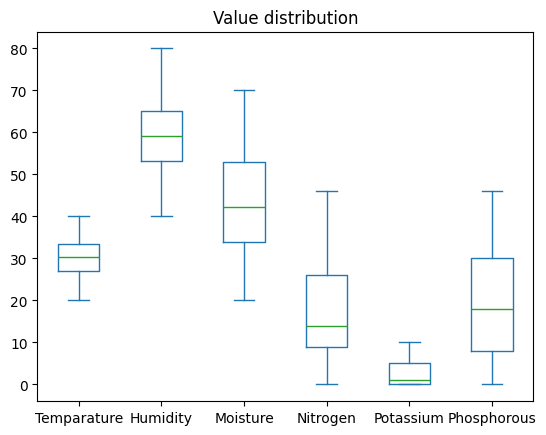

In [11]:
# Calculating IQR value
quantile_q1 = dataframe_crops[cols.POTASSIUM_COLUMN].quantile(0.25)
quantile_q2 = dataframe_crops[cols.POTASSIUM_COLUMN].quantile(0.75)
iqr = quantile_q2 - quantile_q1

quantile_top_margin_value = quantile_q2 + iqr
print(quantile_top_margin_value)
# assign top margin value for outlier columns
dataframe_crops[cols.POTASSIUM_COLUMN].mask(dataframe_crops[cols.POTASSIUM_COLUMN] > quantile_top_margin_value, quantile_top_margin_value, inplace = True)

dataframe_crops.plot(kind="box", title="Value distribution")
plt.show()

We have performed outlier handling by assigning limit value in outlier value places. Now we can perform balancing of unbalanced data.

In [12]:
matrix = dataframe_crops.select_dtypes(include='number').corr()

print(matrix)

             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.525594  0.067963 -0.028978  -0.012350     0.166951
Humidity        0.525594  1.000000  0.066713 -0.042701   0.019225     0.136216
Moisture        0.067963  0.066713  1.000000 -0.085016   0.052445     0.011854
Nitrogen       -0.028978 -0.042701 -0.085016  1.000000  -0.466244    -0.635694
Potassium      -0.012350  0.019225  0.052445 -0.466244   1.000000     0.103984
Phosphorous     0.166951  0.136216  0.011854 -0.635694   0.103984     1.000000


# Dataset balancing

Here we have applied SMOTE-NC to generate new data based on existing data to make our dataset completely balanced. We divided our columns in categorical and numerical, and passed them to SMOTE-NC function. We can also use these lists to separately scale numerical and categorical data.

In [13]:
from balancer import balance_SMOTENC
import ipdb



feature_column_list = list(
    filter(lambda column: column != cols.FERTILIZER_NAME_COLUMN, cols.column_list)
)
target_column = cols.FERTILIZER_NAME_COLUMN
# dataframe_crops = balance_SMOTENC(df = dataframe_crops, feature_columns = cols.column_list, target_column = target_column)


# get numerical and categorical features
crops_features_dataframe = dataframe_crops[feature_column_list].copy()
get_loc_of_column = lambda column: crops_features_dataframe.columns.get_loc(column)

categorical_features = list(
    map(
        get_loc_of_column,
        filter(
            lambda column: ptypes.is_object_dtype(dataframe_crops[column].dtype),
            feature_column_list,
        ),
    )
)


dataframe_crops = balance_SMOTENC(
    dataframe_crops,
    feature_columns=feature_column_list,
    target_column=target_column,
    categorical_features=categorical_features,
)

dataframe_crops.groupby([cols.FERTILIZER_NAME_COLUMN]).count()

# df_npk = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.NPK_COMPLEX]
# df_high_np = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.HIGH_NP]
# df_nitrogenous = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.NITROGENOUS]
# df_phosphatic = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.PHOSPHATIC]


# df_npk = dataframe_crops[cols.]

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
Fertilizer Name,,,,,,,,
High-N/P,3440,3440,3440,3440,3440,3440,3440,3440
NPK Complex,3440,3440,3440,3440,3440,3440,3440,3440
Nitrogenous,3440,3440,3440,3440,3440,3440,3440,3440
Phosphatic,3440,3440,3440,3440,3440,3440,3440,3440


# Box graph draw of new balanced data

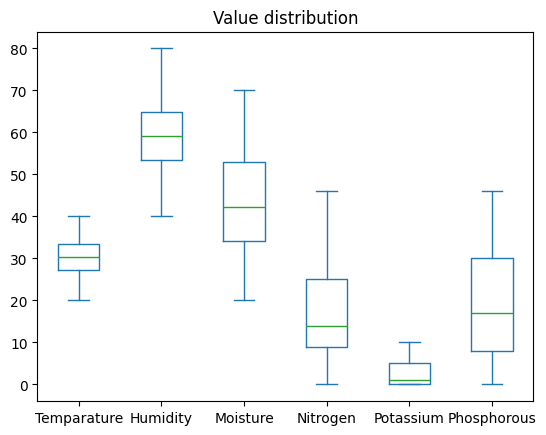

In [14]:

dataframe_crops.plot(kind="box", title="Value distribution")
plt.show()

## Dataset scaling and division

Now we will divide data on training data and test data. Then we will perform scaling of data.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = dataframe_crops[cols.FERTILIZER_NAME_COLUMN]
X = dataframe_crops.drop(columns=[cols.FERTILIZER_NAME_COLUMN])

X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1066
)

drop_categorical_input_columns = lambda df, columns: df.drop(columns, axis=1)

X_train_numerical = drop_categorical_input_columns(
    X_train, cols.categorical_input_columns
)
X_test_numerical = drop_categorical_input_columns(
    X_test, cols.categorical_input_columns
)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_numerical)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numerical.columns)
X_train_scaled_df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,1.169600e+04,1.169600e+04,1.169600e+04,1.169600e+04,1.169600e+04,1.169600e+04
mean,-2.041231e-16,7.624240e-16,1.919729e-16,7.290110e-17,6.075092e-18,1.287919e-16
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-2.407882e+00,-2.406082e+00,-1.908077e+00,-1.547363e+00,-7.950098e-01,-1.389443e+00
25%,-7.351557e-01,-7.216106e-01,-7.661656e-01,-7.830804e-01,-7.950098e-01,-7.828613e-01
50%,-1.573577e-02,-9.272151e-03,-1.233434e-01,-3.584789e-01,-5.265870e-01,-1.004573e-01
75%,6.976040e-01,7.072102e-01,7.423142e-01,5.756443e-01,5.471042e-01,8.852375e-01
max,2.223573e+00,2.590182e+00,2.116203e+00,2.358970e+00,1.889218e+00,2.098400e+00


### Handling categorical values

Since all categorical values don't naturally have any order (Like for example having categorical attribute blood_pressure=[low, medium, high]), we will use one-hot enconding

In [16]:
from sklearn.preprocessing import OneHotEncoder

one_hot: OneHotEncoder = OneHotEncoder()

X_train_categorical: pd.DataFrame = X_train[cols.categorical_input_columns].copy()
X_test_categorical: pd.DataFrame = X_test[cols.categorical_input_columns].copy()

X_train_categorical_scaled = one_hot.fit_transform(X_train_categorical)

X_train_categorical_df = pd.DataFrame(
    X_train_categorical, columns=X_train_categorical.columns
)

X_train_categorical_df.head(5)

,Crop Type,Soil Type
3989,Millets,Red
12629,Barley,Loamy
1443,Maize,Loamy
11286,Millets,Red
6987,Cotton,Clayey


In [17]:
one_hot_output = OneHotEncoder()

